### Project code IV - Prediction on growth

### Qian Zhang

In [1]:
# set directory

wdi_directory='../data'
corrpution_ind_directory='../data'

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### load in the panel

In [3]:
panel=pd.read_csv(wdi_directory+'/'+'final_panel.csv')

In [4]:
panel=panel.drop(['Unnamed: 0'],axis=1)

In [5]:
panel

,country_id,Country Code,SVMCI,ci_rq,svmci_sqr,lag_lgdp_pcap,pl_MAR,pl_MEX,pl_SLB,pl_VEN,...,WDI.NATUR.RESOUR.PER.GDP,WDI.NET.INFLOW.FDI.PER.GDP,WDI.TRADE.PER.GDP,WGI.CON.CORR,WGI.GOV.EFF,WGI.POLI.STAB,WGI.REG.QUAL,WGI.RULE.LAW,WGI.VOI.ACC,Year
0,0,AFG,NaN,NaN,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,-1.291705,-2.175167,-2.414042,-2.090330,-1.788075,-1.908540,1996
1,0,AFG,NaN,NaN,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,-1.307016,-1.796905,-2.225586,-2.036767,-1.800458,-1.728917,1997
2,0,AFG,NaN,NaN,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,-1.180848,-2.135942,-2.422996,-2.087256,-1.737140,-2.039301,1998
3,0,AFG,NaN,NaN,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,-1.329631,-1.738820,-2.266842,-1.947092,-1.782136,-1.653745,1999
4,0,AFG,NaN,NaN,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,-1.295380,-2.231651,-2.440187,-2.109626,-1.778437,-2.031417,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,127,ZWE,0.142179,-0.268509,0.020215,6.972068,0,0,0,0,...,8.070786,2.044131,74.162535,-1.368143,-1.336259,-0.778662,-1.888528,-1.629983,-1.471968,2012
2684,127,ZWE,0.148406,-0.273618,0.022024,7.109228,0,0,0,0,...,6.533939,1.954060,58.656494,-1.404895,-1.277510,-0.665950,-1.843716,-1.579165,-1.386220,2013
2685,127,ZWE,0.155365,-0.295680,0.024138,7.111152,0,0,0,0,...,6.999527,2.425173,54.671615,-1.391291,-1.210598,-0.713570,-1.903126,-1.431254,-1.256964,2014
2686,127,ZWE,0.148473,-0.245507,0.022044,7.117096,0,0,0,0,...,6.698087,1.999687,56.748811,-1.310461,-1.157869,-0.618156,-1.653554,-1.317532,-1.165904,2015


In [6]:
panel['SVMCI'].values

array([       nan,        nan,        nan, ..., 0.15536519, 0.1484726 ,
       0.15019335])

In [7]:
panel.insert(0, 'gdp_pcap', np.exp(panel['lgdp_pcap'].values),True)

In [8]:
preddf=panel[['Country Code','country_id','Year','gdp_pcap','SVMCI','reg_qual','inflation','gov_consu%','trade_open%','capi_invest%','natur_resouc%','fdi_inflow%']]

In [9]:
preddf

,Country Code,country_id,Year,gdp_pcap,SVMCI,reg_qual,inflation,gov_consu%,trade_open%,capi_invest%,natur_resouc%,fdi_inflow%
0,AFG,0,1996,NaN,NaN,-2.090330,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,0,1997,NaN,NaN,-2.036767,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,0,1998,NaN,NaN,-2.087256,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,0,1999,NaN,NaN,-1.947092,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,0,2000,NaN,NaN,-2.109626,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2683,ZWE,127,2012,1223.203432,0.142179,-1.888528,4.028577,20.005957,74.162535,12.148340,8.070786,2.044131
2684,ZWE,127,2013,1225.558112,0.148406,-1.843716,9.370603,18.438697,58.656494,9.181371,6.533939,1.954060
2685,ZWE,127,2014,1232.864865,0.155365,-1.903126,-0.252141,19.560283,54.671615,9.609292,6.999527,2.425173
2686,ZWE,127,2015,1234.103352,0.148473,-1.653554,0.607814,18.877513,56.748811,9.995567,6.698087,1.999687


In [10]:
# import packages

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

from pandas import Series, DataFrame
import statsmodels.api as sm

import graphviz
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report, mean_squared_error
from pylab import rcParams
from scipy.interpolate import LSQUnivariateSpline
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from scipy.stats import uniform as sp_uniform

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform as sp_uniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [12]:
# rm any na rows before training

temp=preddf[:0]
for row in preddf.iterrows():
    if row[1].isna().any():
        pass
    else:
        temp=temp.append(row[1])
        
        #print(np.NaN==ele)

In [13]:
preddf=temp.copy()

### dataset setting before prediction

In [14]:
X, y = preddf[['SVMCI','reg_qual','inflation','gov_consu%','trade_open%','capi_invest%','natur_resouc%','fdi_inflow%']], preddf[['gdp_pcap']]

In [15]:
# try one split of data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

In [17]:
# get a dict for the mse of prediction

from sklearn.metrics import mean_squared_error
msepred={}

### ridge reg

In [18]:
# ridge
from sklearn.linear_model import Ridge

param_dist1 = {'alpha': sp_uniform(loc=0.1, scale=10.0),
                   'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                   }

ridge = Ridge()

rscv1 = RandomizedSearchCV(ridge, param_dist1, 
            n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rscv1.fit(X_train, y_train)
print('MSE of the optimal results from ridge:', abs(rscv1.best_score_))

MSE of the optimal results from ridge: 32488548.39534827


In [19]:
pred_y_ridge=rscv1.predict(X_test)

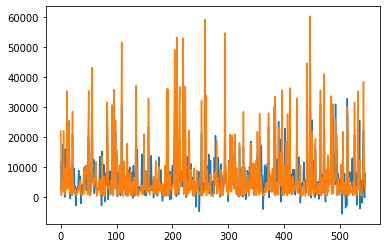

In [20]:
plt.plot(pred_y_ridge)
plt.plot(y_test.values)

In [21]:
# calc the prediction mse

msepred['ridge']=mean_squared_error(y_test, pred_y_ridge)

### lasso reg

In [22]:
# lasso

from sklearn.linear_model import Lasso

param_dist2 = {'alpha': sp_uniform(loc=0.1, scale=10.0),
                   'selection':['cyclic', 'random']
                   }

lasso = Lasso()

rscv2 = RandomizedSearchCV(lasso, param_dist2, 
            n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rscv2.fit(X_train, y_train)
print('MSE of the optimal results from lasso:', abs(rscv2.best_score_))

MSE of the optimal results from lasso: 32489878.150845755


In [23]:
pred_y_lasso=rscv2.predict(X_test)

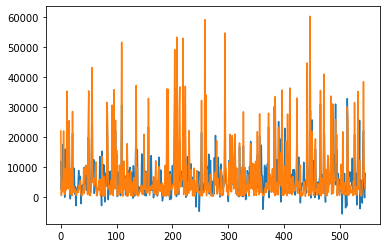

In [24]:
plt.plot(pred_y_lasso)
plt.plot(y_test.values)

In [25]:
msepred['lasso']=mean_squared_error(y_test, pred_y_lasso)

### ols

In [26]:
#ols
from sklearn.linear_model import LinearRegression

# actually no special para to loop for OLS

param_dist3 = {
                   }

ols = LinearRegression()

rscv3 = RandomizedSearchCV(ols, param_dist3, 
            n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rscv3.fit(X_train, y_train)
print('MSE of the optimal results from ols:', abs(rscv3.best_score_))

MSE of the optimal results from ols: 32489779.934250563


In [27]:
pred_y_ols=rscv3.predict(X_test)

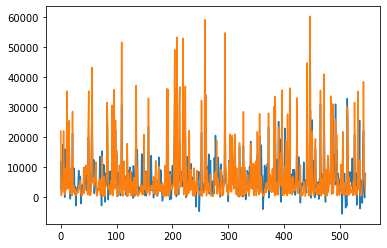

In [28]:
plt.plot(pred_y_ols)
plt.plot(y_test.values)

In [29]:
msepred['ols']=mean_squared_error(y_test, pred_y_ols)

### Linear SVR

In [30]:
#svr

from sklearn.svm import LinearSVR

param_dist4 = {'C': sp_uniform(loc=0.01, scale=10.0),
                'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'],}

svm = LinearSVR(max_iter=10000)

rscv4 = RandomizedSearchCV(svm, param_dist4, 
            n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rscv4.fit(X_train, y_train)
print('MSE of the optimal results from svr:', abs(rscv4.best_score_))

MSE of the optimal results from svr: 32808309.760804076


In [31]:
pred_y_svr=rscv4.predict(X_test)

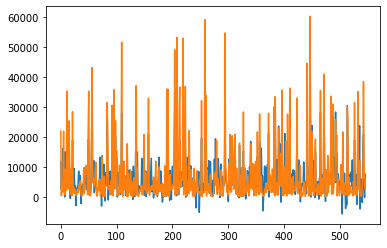

In [32]:
plt.plot(pred_y_svr)
plt.plot(y_test.values)

In [33]:
msepred['svr']=mean_squared_error(y_test.values, pred_y_svr)

### neural network

In [34]:
# neural
from sklearn.neural_network import MLPRegressor

param_dist5 = {'activation':['identity', 'logistic', 'tanh'],
               'solver':['lbfgs','adam'],
               'hidden_layer_sizes':sp_randint(1, 10)}

mlp_culti = MLPRegressor(max_iter=1000)

rscv5 = RandomizedSearchCV(mlp_culti, param_dist5, 
        n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rscv5.fit(X_train, y_train)
print('MSE of the optimal results from neural network:', abs(rscv5.best_score_))

MSE of the optimal results from neural network: 32094008.190681808


In [35]:
pred_y_neu=rscv5.predict(X_test)

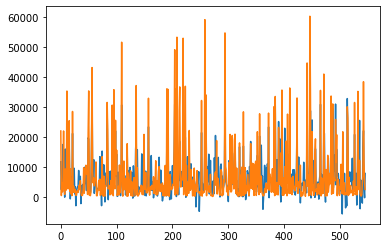

In [36]:
plt.plot(pred_y_neu)
plt.plot(y_test.values)

In [37]:
msepred['neural_network']=mean_squared_error(y_test, pred_y_neu)

### random forest

In [38]:
# random forest
from sklearn.ensemble import RandomForestRegressor

param_dist6 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}

rf = RandomForestRegressor(bootstrap=True, oob_score=True)

rscv6 = RandomizedSearchCV(rf, param_dist6, 
         n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rscv6.fit(X_train, y_train)
print('MSE of the optimal results from random forest:', abs(rscv6.best_score_))

MSE of the optimal results from random forest: 24099489.615097407


In [39]:
pred_y_rf=rscv6.predict(X_test)

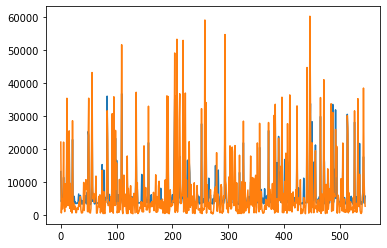

In [40]:
plt.plot(pred_y_rf)
plt.plot(y_test.values)

In [41]:
msepred['random_forest']=mean_squared_error(y_test, pred_y_rf)

### knn

In [42]:
# knn

from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor()

param_dist7 = {'n_neighbors':np.arange(0,10,1),
                'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size':np.arange(0,50,1)}


rscv7= RandomizedSearchCV(knn, param_dist7, 
                        n_iter=200, n_jobs=-1, cv=5, random_state=25,
                           scoring='neg_mean_squared_error')

rscv7.fit(X_train,y_train)
print('MSE of the optimal results from knn:', abs(rscv7.best_score_))

MSE of the optimal results from knn: 36592528.87785097


In [43]:
pred_y_knn=rscv7.predict(X_test)

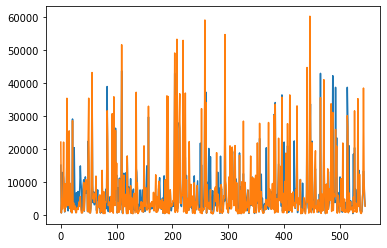

In [44]:
plt.plot(pred_y_knn)
plt.plot(y_test.values)

In [45]:
msepred['knn']=mean_squared_error(y_test, pred_y_knn)

### decision tree

In [46]:
# tree

from sklearn.tree import DecisionTreeRegressor

param_dist8 = {'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}

tree = DecisionTreeRegressor()

rscv8 = RandomizedSearchCV(tree, param_dist8, 
         n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rscv8.fit(X_train, y_train)
print('MSE of the optimal results from random forest:', abs(rscv8.best_score_))

MSE of the optimal results from random forest: 26336153.34617133


In [47]:
pred_y_tree=rscv8.predict(X_test)

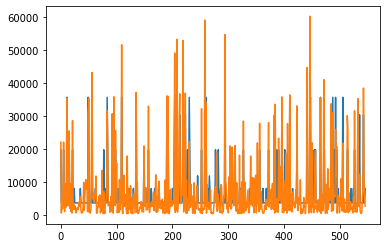

In [48]:
plt.plot(pred_y_tree)
plt.plot(y_test.values)

In [49]:
msepred['tree']=mean_squared_error(y_test, pred_y_tree)

<BarContainer object of 8 artists>

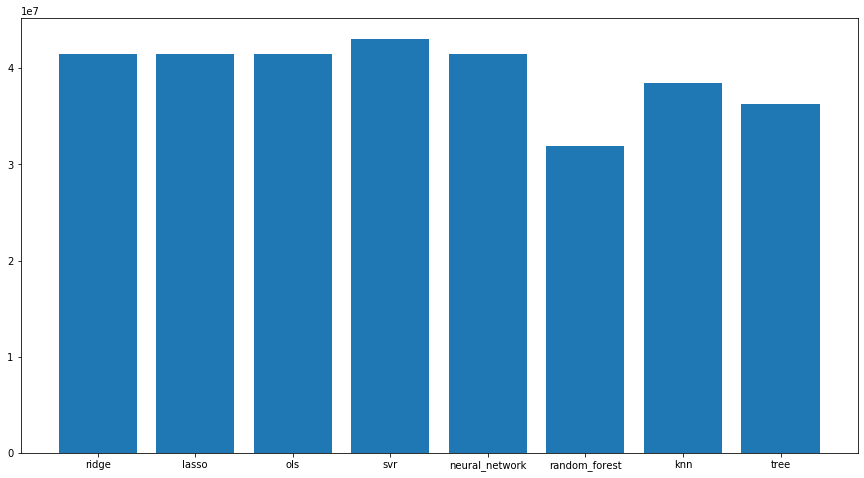

In [50]:
plt.figure(figsize=(15,8))

for key, value in msepred.items():
    msepred
plt.bar(list(msepred.keys()),np.array(list(msepred.values())))

### robust comparison: bootstrapping

In [51]:
msepred_boot={'ridge':[],'lasso':[],'ols':[],'svr':[],'neural_network':[],'random_forest':[],'knn':[],'tree':[]}

In [52]:
# due to the heavy computing, I choose 10 random seeds to perform all eight models

import timeit
start_time = timeit.default_timer()

random_seed=np.random.randint(0,10000,10)

model_dict={'ridge':rscv1,'lasso':rscv2,'ols':rscv3,'svr':rscv4,'neural_network':rscv5
            ,'random_forest':rscv6,'knn':rscv7,'tree':rscv8}

for i, seed in enumerate(random_seed):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=seed)
    
    for model,value in model_dict.items():
        print ('Currently working on bootstrap {}, model {}.'.format(i,model),end='\r',flush=True)
        value.fit(X_train, y_train)
        pred_y=value.predict(X_test)
        msepred_boot[model].append(mean_squared_error(y_test, pred_y))

Text(0, 0.5, 'MSE in prediction')

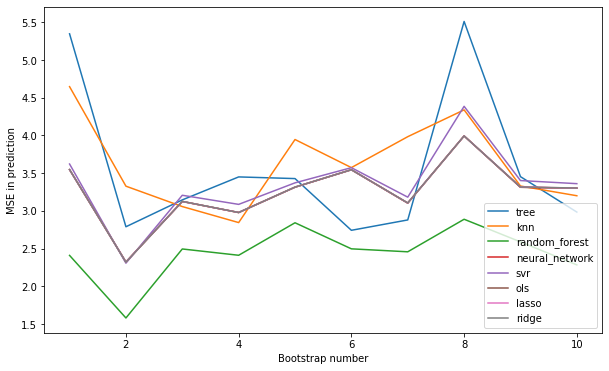

In [55]:
plt.figure(figsize=(10,6))
model_list=list(model_dict.keys())
model_list.reverse()
for key in model_list:
    # reduce the scale to 0-10
    plt.plot(range(1,11),np.array(msepred_boot[key])/1e7, label=key) 
plt.legend(fontsize=10,loc=4)
plt.xlabel('Bootstrap number')
plt.ylabel('MSE in prediction')